# Import libraries

In [1]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision.datasets as datasets
from skimage import io
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean
import time
from PIL import Image
from torch.autograd import Variable
import random


# Parameters

In [2]:
input_size=784     #Number of input neurons(image pixels)
hidden_size=400    #Number of hidden neurons
out_size=10        #Number of classes(0-90
epochs=20          #How many times we pass our entire dataset into our network
batch_size=100     #Her bir iterasyonda alınan data sayısı
learning_rate=0.01

# Download the Dataset

In [3]:
# Prepare the transform structures to apply dataset

# To apply the transformation,we'll use standardization
# Standardization is a normalization technique which makes the mean to zero and std to 1.

# The mean and std of the dataset is known before.
mean_gray=0.1307
stddev_gray=0.3081

transforms=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean_gray),(stddev_gray))])

# Download the dataset

train_dataset=datasets.MNIST(root='./data',
                            train=True,
                            transform=transforms,
                            download=True)

test_dataset=datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms)


# Informations about Dataset

In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.1307, std=0.3081)
           )

In [5]:
train_dataset.transforms

StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.1307, std=0.3081)
           )

In [6]:
train_dataset.data.size()

torch.Size([60000, 28, 28])

In [7]:
len(train_dataset),len(test_dataset)

(60000, 10000)

# Visualize random image

random_img.size(): torch.Size([1, 28, 28])
random_img.shape np.array:  (28, 28)


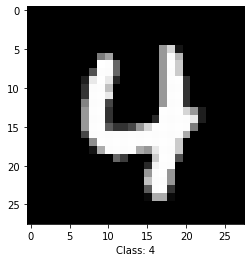

In [8]:
import matplotlib.pyplot as plt

random_num=random.randint(0,train_dataset.data.size(0))

random_img=train_dataset[random_num][0]
print('random_img.size():',random_img.size())
random_img_label=train_dataset[random_num][1]

#To show the image , convert torch.tensor to np.array

random_img=random_img.numpy()*stddev_gray+mean_gray

#Numpy array read the images as (H x W x Ch)
random_img=np.reshape(random_img,(28,28))

print('random_img.shape np.array: ',random_img.shape)

plt.xlabel("Class: "+str(random_img_label))
plt.imshow(random_img,cmap="gray")


# Load the Dataset

In [9]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                       batch_size=batch_size,
                                       shuffle=True)


In [10]:
# batch_size=100
#60000/100=600 , #10000/100=100
len(train_loader),len(test_loader)

(600, 100)

# Visualize random image with batches

In [11]:
"""
plt.figure(figsize=(48,20))

for i in range(batch_size):
    plt.subplot(10,10,i+1)
    t_loader=iter(train_loader)  #t_loader.next().size() -> (100,1,28,28)
    
    images,labels=t_loader.next()


    img=images[i] #i between 0-100 except 100
    label=labels[i].item()
    
    #Convert tensor to np.array to show
    img=img.numpy()*stddev_gray+mean_gray
    img=np.reshape(img,(28,28))
    
    plt.ylabel("Number "+str(label))
    plt.imshow(img,cmap="gray")

print('images.shape: ',images.shape)
print('labels.shape: ',labels.shape)
    """
    

'\nplt.figure(figsize=(48,20))\n\nfor i in range(batch_size):\n    plt.subplot(10,10,i+1)\n    t_loader=iter(train_loader)  #t_loader.next().size() -> (100,1,28,28)\n    \n    images,labels=t_loader.next()\n\n\n    img=images[i] #i between 0-100 except 100\n    label=labels[i].item()\n    \n    #Convert tensor to np.array to show\n    img=img.numpy()*stddev_gray+mean_gray\n    img=np.reshape(img,(28,28))\n    \n    plt.ylabel("Number "+str(label))\n    plt.imshow(img,cmap="gray")\n\nprint(\'images.shape: \',images.shape)\nprint(\'labels.shape: \',labels.shape)\n    '

In [12]:
t_loader=iter(train_loader)
images,labels=t_loader.next()
images.shape,labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

# Build the Model

In [13]:
print(images.shape)
conv2d=nn.Conv2d(1,8,kernel_size=3,padding=1) #stride default=0,pad default=0
y=conv2d(images)
print(y.shape)

batchnorm=nn.BatchNorm2d(8)
y=batchnorm(y)
print(y.shape)

maxpool=nn.MaxPool2d(kernel_size=2)
y=maxpool(y)
print(y.shape)

conv2d=nn.Conv2d(8,32,kernel_size=5,stride=1,padding=2)
y=conv2d(y)
print(y.shape)

batchnorm=nn.BatchNorm2d(32)
y=batchnorm(y)
print(y.shape)

maxpool=nn.MaxPool2d(kernel_size=2)
y=maxpool(y)
print(y.shape)

y=y.view(-1,y.size(1)*y.size(2)*y.size(3))
print(y.shape)

y.flatten().shape



torch.Size([100, 1, 28, 28])
torch.Size([100, 8, 28, 28])
torch.Size([100, 8, 28, 28])
torch.Size([100, 8, 14, 14])
torch.Size([100, 32, 14, 14])
torch.Size([100, 32, 14, 14])
torch.Size([100, 32, 7, 7])
torch.Size([100, 1568])


torch.Size([156800])

In [14]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model,self).__init__()
        
        self.conv1=nn.Conv2d(in_channels=1,out_channels=8,kernel_size=3,padding=1,stride=1)
        self.batchNorm=nn.BatchNorm2d(num_features=8)
        self.relu=nn.ReLU()
        self.maxPool=nn.MaxPool2d(kernel_size=2)
        
        self.conv2=nn.Conv2d(in_channels=8,out_channels=32,kernel_size=5,padding=2,stride=1)
        self.batchNorm2=nn.BatchNorm2d(num_features=32)
        self.maxPool2=nn.MaxPool2d(kernel_size=2)
        
        
        self.fc1=nn.Linear(in_features=32*7*7,out_features=600)
        self.dropout=nn.Dropout(p=0.5)
        self.fc2=nn.Linear(in_features=600,out_features=10)
        
        #Initialize weights and bias to zero
        
        
    def forward(self,x):
        
        inp=self.conv1(x)
        x=self.batchNorm(inp)
        x=self.relu(x)
        x=self.maxPool(x)
        
        x=self.conv2(x)
        x=self.batchNorm2(x)
        x=self.relu(x)
        x=self.maxPool2(x)
        
        x=x.view(-1,32*7*7)
        
        x=self.fc1(x)
        
        x=self.relu(x)
        x=self.dropout(x)
        
        x=self.fc2(x)
        
        return x
        

"""
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Linear):
                nn.init.constant_(m.weight,0)
                nn.init.constant_(m.bias,0)
                """
                
        
        

'\n    def initialize_weights(self):\n        for m in self.modules():\n            if isinstance(m,nn.Linear):\n                nn.init.constant_(m.weight,0)\n                nn.init.constant_(m.bias,0)\n                '

# Select GPU and extract the model

In [15]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=CNN_Model()
model=model.to(device)


In [16]:
for m in model.modules(): 
    print(m)

CNN_Model(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batchNorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=600, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=600, out_features=10, bias=True)
)
Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2,

In [17]:
model.fc1.weight

Parameter containing:
tensor([[ 0.0141, -0.0033, -0.0054,  ...,  0.0174,  0.0204, -0.0189],
        [ 0.0203,  0.0177,  0.0243,  ...,  0.0160,  0.0213,  0.0252],
        [-0.0205, -0.0078,  0.0145,  ...,  0.0135, -0.0129,  0.0112],
        ...,
        [ 0.0146, -0.0192,  0.0173,  ..., -0.0079, -0.0189,  0.0128],
        [ 0.0023,  0.0223, -0.0029,  ..., -0.0050,  0.0199,  0.0214],
        [-0.0060,  0.0165, -0.0179,  ..., -0.0220, -0.0098,  0.0104]],
       device='cuda:0', requires_grad=True)

In [18]:
model.fc1.bias

Parameter containing:
tensor([-9.0563e-03, -8.2611e-03, -2.9319e-03,  2.4646e-03, -1.3067e-03,
        -1.8145e-02,  8.7194e-03, -1.3646e-02,  1.1308e-02, -1.9445e-02,
         1.5277e-02,  1.0669e-02, -8.8263e-04,  1.7343e-02,  1.8808e-02,
        -1.0533e-02, -1.6943e-03, -2.6654e-03, -2.2756e-02,  1.4503e-03,
         1.3694e-02, -2.1809e-02,  2.2662e-02, -2.3843e-02, -1.4777e-02,
         1.5940e-02,  1.9470e-02, -1.8748e-02,  1.3427e-02, -1.7091e-02,
        -8.7866e-03, -3.5324e-03, -1.2821e-02,  3.8435e-03, -1.9684e-02,
         1.8750e-02,  1.5518e-02,  1.6514e-02, -6.2272e-03, -2.9470e-03,
        -3.5586e-03,  3.6268e-03,  2.1928e-04, -5.6169e-03,  5.4488e-03,
         1.0778e-02, -2.0247e-02,  1.4515e-02,  2.4707e-02,  1.0268e-02,
        -1.5074e-02,  4.8552e-03, -2.4419e-02, -1.1573e-02, -1.2298e-02,
         1.8090e-02, -2.0798e-02,  1.7640e-02, -7.7471e-04,  2.3276e-02,
         7.0376e-04,  1.5103e-02,  3.2125e-03, -4.7701e-03,  5.8550e-03,
         1.4078e-02,  1.8957e

In [19]:
print(model.conv1)
print(model.conv2)
print(model.conv1.weight.shape) # input->1 filtre-out->8 tane filtre ve 3 x 3 kernel
print(model.conv2.weight.shape) # input->8 filtre-out->32 tane filtre ve 5 x 5 kernel

Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
torch.Size([8, 1, 3, 3])
torch.Size([32, 8, 5, 5])


In [20]:
print(model.fc1)
print(model.fc2)
print(model.fc1.weight.shape)
print(model.fc2.weight.shape)

Linear(in_features=1568, out_features=600, bias=True)
Linear(in_features=600, out_features=10, bias=True)
torch.Size([600, 1568])
torch.Size([10, 600])


# Select Loss Function and Optimizer

In [21]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)


# Training the CNN Model

In [22]:
import time
from tqdm import tqdm
start=time.time()

train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

for epoch in range(epochs):
    n_correct=0
    batch_iter=0
    batch_loss=0.0
    
    for i,(images,labels) in enumerate(train_loader):
        images=images.to(device)
        labels=labels.to(device)
        
        #Forward pass - prediction
        output=model(images)
        loss_val=loss_fn(output,labels)
        batch_loss+=loss_val.item()
        
        #Set zero the graidents of the optimizer
        optimizer.zero_grad()
        
        #Backward pass
        loss_val.backward()
        
        
        #Update weights and bias
        optimizer.step()
        
        
        #Get predicted results
        _,predicted=torch.max(output,1)
        n_correct+=(predicted==labels).sum().item()
        
        batch_iter+=1
        
    train_loss.append(batch_loss/batch_iter)
    train_acc.append(100*n_correct/len(train_dataset))
    
    # Testing phase
    n_test_correct=0
    batch_test_iter=0
    batch_test_loss=0.0
    
    model.eval()
    
    
    for i,(images,labels) in enumerate(test_loader):
        images=images.to(device)
        labels=labels.to(device)

        #Forward pass
        output=model(images)
        loss_val=loss_fn(output,labels)
        batch_test_loss+=loss_val.item()

        # Get test_predicted results
        _,testPred=torch.max(output,1)
        n_test_correct+=(testPred==labels).sum().item()

        batch_test_iter+=1
        
    test_loss.append(batch_test_loss/batch_test_iter)
    test_acc.append(100*n_test_correct/len(test_dataset))
        
        
        
    print("Epoch {}/{}, Training Loss: {:.3f}, Training Acc: {:.3f}, Testing Loss: {:.3f},Testing Acc: {:.3f}".format(
            epoch+1,epochs,train_loss[-1],train_acc[-1],test_loss[-1],test_acc[-1]))  
            
        
end=time.time()        
print("Training Duration:",end-start)
    
    

Epoch 1/20, Training Loss: 0.788, Training Acc: 77.828, Testing Loss: 0.078,Testing Acc: 97.430
Epoch 2/20, Training Loss: 0.061, Training Acc: 98.083, Testing Loss: 0.045,Testing Acc: 98.630
Epoch 3/20, Training Loss: 0.042, Training Acc: 98.640, Testing Loss: 0.057,Testing Acc: 98.250
Epoch 4/20, Training Loss: 0.037, Training Acc: 98.852, Testing Loss: 0.041,Testing Acc: 98.670
Epoch 5/20, Training Loss: 0.031, Training Acc: 99.040, Testing Loss: 0.046,Testing Acc: 98.490
Epoch 6/20, Training Loss: 0.033, Training Acc: 98.960, Testing Loss: 0.042,Testing Acc: 98.770
Epoch 7/20, Training Loss: 0.026, Training Acc: 99.167, Testing Loss: 0.038,Testing Acc: 98.850
Epoch 8/20, Training Loss: 0.027, Training Acc: 99.150, Testing Loss: 0.038,Testing Acc: 98.860
Epoch 9/20, Training Loss: 0.023, Training Acc: 99.250, Testing Loss: 0.046,Testing Acc: 98.890
Epoch 10/20, Training Loss: 0.024, Training Acc: 99.227, Testing Loss: 0.053,Testing Acc: 98.760
Epoch 11/20, Training Loss: 0.019, Trai

<function matplotlib.pyplot.show(close=None, block=None)>

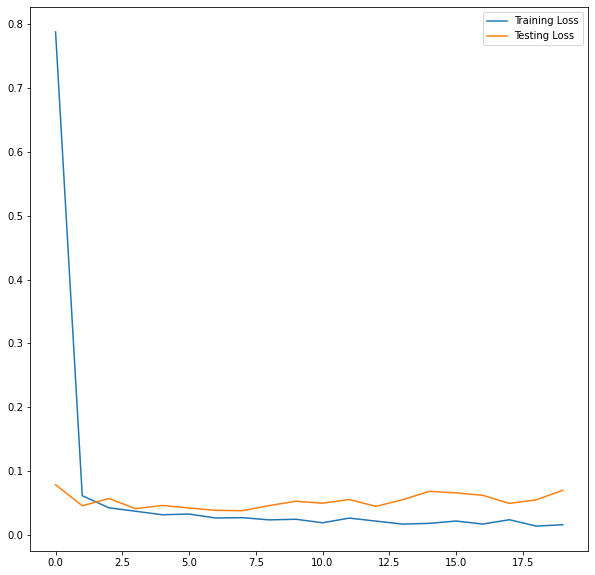

In [23]:
#Plotting the loss
f=plt.figure(figsize=(10,10))
plt.plot(train_loss,label="Training Loss")
plt.plot(test_loss,label="Testing Loss")
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

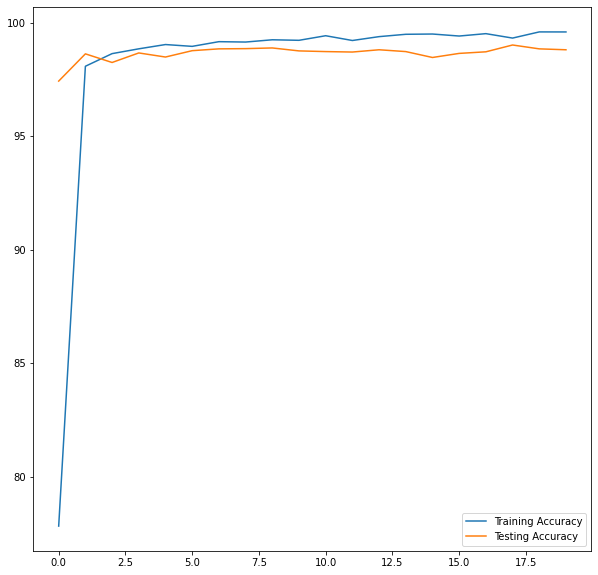

In [24]:
#Plotting the accuracy
f=plt.figure(figsize=(10,10))
plt.plot(train_acc,label="Training Accuracy")
plt.plot(test_acc,label="Testing Accuracy")
plt.legend()
plt.show


# Prediction any image

Prediction is: 2
Actual is: 2


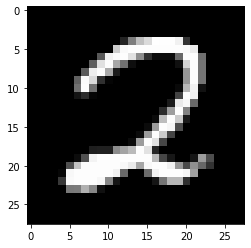

In [25]:
img=test_dataset[35][0].resize_((1,1,28,28))
label=test_dataset[35][1]

model.eval()

img=img.cpu()
model=model.cpu()

output=model(img)
_,pred=torch.max(output,1)

#CUDA cannot convert tensor to numpy

img_numpy=img.numpy()*stddev_gray+mean_gray
img_numpy=np.reshape(img_numpy,(28,28))
plt.imshow(img_numpy,cmap="gray")

print("Prediction is: {}".format(pred.item()))
print("Actual is: {}".format(label))



# Predict our image

In [26]:
import cv2

In [27]:
def predict(img_name,model):
    img=cv2.imread(img_name,0)
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    
    img=thresh
    
    cv2.namedWindow("original",cv2.WINDOW_NORMAL)
    cv2.resizeWindow("original",400,400)
    cv2.imshow("original",img)
    
    img=Image.fromarray(img)
    img=transforms(img)
    img=img.view((1,1,28,28))
    img=Variable(img)
    
    model.eval()
    
    model=model.to(device)
    img=img.to(device)
    
    output=model(img)
    print(output)
    _,pred=torch.max(output,1)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return pred.item()
    
    
    
    

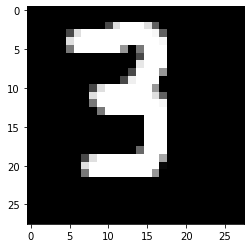

In [28]:
img=cv2.imread("test_3.png",0)
img=np.array(img)
plt.imshow(img,cmap=plt.cm.binary)

In [29]:
pred=predict("test_3.png",model)
print("Predicted Label is {}".format(pred))

tensor([[-33.8196,   2.3124,  -7.1775,  30.8504, -24.4975, -37.3280, -29.6329,
           4.8169, -39.6650, -33.6551]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Predicted Label is 3


# Saving Model

In [ ]:
torch.save(model,"myModel.pth")

# Save only the weights
torch.save(model.state_dict(),"myModel_weights.pth")

# Load Model

In [ ]:
model1=torch.load("myModel.pth")
model1.eval()

# 2.yol
model1=CNN_Model()
model1.load_state_dict(torch.load("myModel.pth"))
model.eval()
